We're going to use the classifier knowledge that we've learned so far and apply it to the shalek2013 and macaulay2016 datasets.

In [1]:
! wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41265/suppl/GSE41265_allGenesTPM.txt.gz

--2016-06-06 08:01:53--  ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41265/suppl/GSE41265_allGenesTPM.txt.gz
           => 'GSE41265_allGenesTPM.txt.gz'
Resolving ftp.ncbi.nlm.nih.gov... 130.14.250.11, 2607:f220:41e:250::10
Connecting to ftp.ncbi.nlm.nih.gov|130.14.250.11|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /geo/series/GSE41nnn/GSE41265/suppl ... done.
==> SIZE GSE41265_allGenesTPM.txt.gz ... 1099290
==> PASV ... done.    ==> RETR GSE41265_allGenesTPM.txt.gz ... done.
Length: 1099290 (1.0M) (unauthoritative)

GSE41265_allGenesTP 100%[=====================>]   1.05M  1.45MB/s   in 0.7s   

2016-06-06 08:01:55 (1.45 MB/s) - 'GSE41265_allGenesTPM.txt.gz' saved [1099290]



In [50]:
# Alphabetical order is standard
# We're doing "import superlongname as abbrev" for our laziness - this way we don't have to type out the whole thing each time.

# Python plotting library
import matplotlib.pyplot as plt

# Numerical python library (pronounced "num-pie")
import numpy as np

# Dataframes in Python
import pandas as pd

# T-test of independent samples
from scipy.stats import ttest_ind

# Statistical plotting library we'll use
import seaborn as sns

# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline

# Read the data table
shalek2013_expression = pd.read_table('GSE41265_allGenesTPM.txt.gz', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0, 

                                     # Tells pandas to decompress the gzipped file
                                      compression='gzip')
shalek2013_expression = np.log2(shalek2013_expression+1)
shalek2013_expression.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028436,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.033427,0.000000,0.000000,0.041774,0.000000,0.077861,0.000000,0.041871,...,0.000000,0.000000,0.044960,0.000000,0.000000,0.000000,5.431296,0.748742,0.032801,0.150866
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,...,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000,3.019587,2.949914,3.956563
T2,0.149583,0.228984,0.000000,0.000000,0.242088,0.105695,0.109290,0.000000,0.129215,0.106459,...,0.759973,0.014551,0.113616,0.000000,0.000000,0.120192,0.095146,0.086869,0.000000,0.071221


In [51]:
from sklearn.svm import SVC

In [52]:
classifier = SVC(kernel='linear')

In [54]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

In [55]:
shalek2013_expression = shalek2013_expression.T

In [56]:
shalek2013_singles = shalek2013_expression.loc[[x for x in shalek2013_expression.index if x.startswith('S')]]
shalek2013_singles.shape

(18, 27723)

In [57]:
shalek2013_singles = shalek2013_singles.loc[:, (shalek2013_singles > 1).sum() >= 3]
shalek2013_singles.shape

(18, 6312)

In [58]:
mature = 'S12', 'S13', 'S16'
target = [1 if x in mature else 0 for x in shalek2013_singles.index]
target

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]

In [59]:
classifier.fit(shalek2013_singles, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [146]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, MDS


smusher = TSNE(n_components=2)
reduced_data = smusher.fit_transform(shalek2013_singles+1)

In [149]:
reduced_data_df = pd.DataFrame(reduced_data)

In [151]:
reduced_data_df.min()

0   -0.000158
1   -0.000139
dtype: float64

In [113]:
reduced_data_df.max()

0    0.194279
1    0.532746
dtype: float64

In [152]:
reduced_data_df.quantile(1)

0    0.000184
1    0.000207
dtype: float64

In [159]:
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
X = np.linspace(x_min, x_max, 50)
Y = np.linspace(y_min, y_max, 50)
xx, yy = np.meshgrid(X, Y)

# Get the decision boundary
Z = classifier_smushed.decision_function(np.c_[xx.ravel(), yy.ravel()])

two_d_space = np.c_[xx.ravel(), yy.ravel()]
two_d_space

In [161]:
two_d_space.shape

(2500, 2)

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


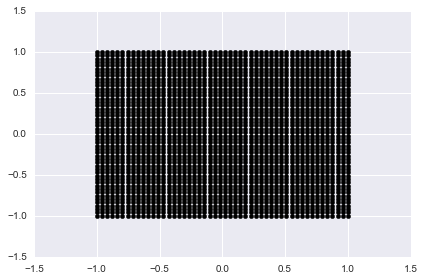

In [162]:
plt.scatter(two_d_space[:, 0], two_d_space[:, 1], color='black')

In [165]:
smusher.

4.0

In [163]:
unsmushed = smusher.inverse_transform(two_d_space)

AttributeError: 'TSNE' object has no attribute 'inverse_transform'

In [158]:
Z = classifier.decision_function(unsmushed)
Z = Z.reshape(xx.shape)

ValueError: total size of new array must be unchanged

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


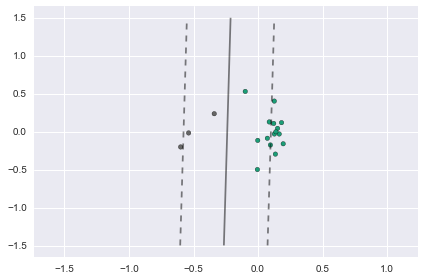

In [145]:
fig, ax = plt.subplots()
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='Dark2')
ax.contour(X, Y, Z, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

### Exercise 1

1. Try the same analysis, but use ICA instead of PCA. 
    1. How are the results different? 
    2. Are the cells closer or farther from the decision boundary? 
    3. Is that a "better" or "worse" classification? Why?
    4. Why does the reduction algorithm affect the visualization of the classification?
2. Try the same analysis, but use MDS or t-SNE instead of PCA. 
    1. How are the results different? 
    2. Are the cells closer or farther from the decision boundary? 
    3. Is that a "better" or "worse" classification? Why?
3. Try the same analysis, but use the "LPS Response" genes and a dimensionality reduction algorithm of your choice.
    1. How are the results different? 
    2. Are the cells closer or farther from the decision boundary? 
    3. Is that a "better" or "worse" classification? Why?

## Decision trees

In [182]:
def visualize_tree(estimator, X, y, smusher, boundaries=True,
                   xlim=None, ylim=None):
    estimator.fit(X, y)
    smushed = smusher.fit_transform(X)

    if xlim is None:
        xlim = (smushed[:, 0].min() - 0.1, smushed[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (smushed[:, 1].min() - 0.1, smushed[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    two_d_space = np.c_[xx.ravel(), yy.ravel()]
    unsmushed = smusher.inverse_transform(two_d_space)
    Z = estimator.predict(unsmushed)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='Paired')
    plt.clim(y.min(), y.max())

    # Plot also the training points
    plt.scatter(smushed[:, 0], smushed[:, 1], c=y, s=50, cmap='Paired')
    plt.axis('off')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


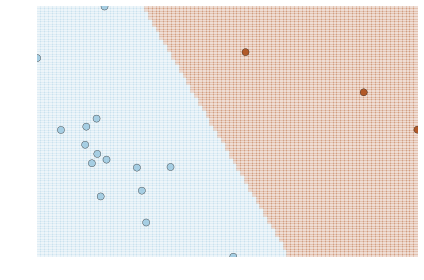

In [186]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()


from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, MDS


smusher = PCA(n_components=2)
# reduced_data = smusher.fit_transform(shalek2013_singles+1)

visualize_tree(classifier, shalek2013_singles, np.array(target), smusher)

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


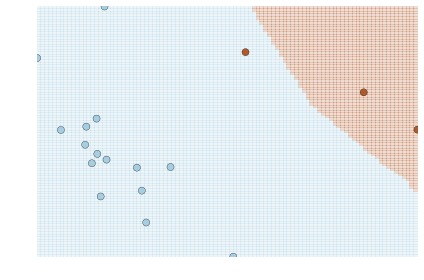

In [189]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
classifier = RandomForestClassifier()

smusher = PCA(n_components=2)
# reduced_data = smusher.fit_transform(shalek2013_singles+1)

visualize_tree(classifier, shalek2013_singles, np.array(target), smusher, boundaries=False)

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


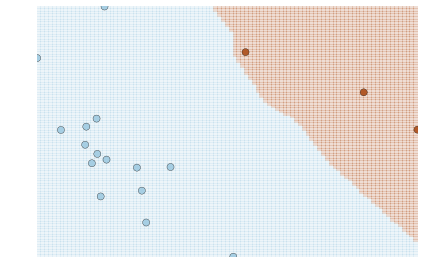

In [190]:
classifier = ExtraTreesClassifier()

smusher = PCA(n_components=2)
# reduced_data = smusher.fit_transform(shalek2013_singles+1)

visualize_tree(classifier, shalek2013_singles, np.array(target), smusher, boundaries=False)

### Macaulay2016

In [214]:
pd.options.display.max_columns = 50

In [215]:
macaulay2016_metadata = pd.read_csv('../4._Case_Study/macaulay2016/sample_info_qc.csv', index_col=0)
macaulay2016_metadata.head()

,% Parent,% Total,3'UTR_Exons,488,5'UTR_Exons,561,Average mapped length,CDS_Exons,Cells,ERCC Content,FSC Horizontal,Introns,MT Content,Number of input reads,Number of reads mapped to multiple loci,Pass QC,Population,SSC,TES_down_10kb,TES_down_1kb,TES_down_5kb,TSS_up_10kb,TSS_up_1kb,TSS_up_5kb,Time,Total Assigned Tags,Total Tags,Uniquely mapped reads number,Well.1,batch,cluster,condition,detected_genes,detection_limit,difference_component,genes_above_detection_limit,log_detection_limit,log_total_molecules,lower_tpm_limit,molecule_r2,outlier_component,total_molecules,within_large_component,within_small_component,cluster_color,tsne_0,tsne_1,log_488,log_SSC
Well,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DIM_1_A1,NaN,100.00%,615178,80.0,118167,6.0,229.53,1273306,1.0,116339.14620,26224.0,335710,50283.35600,1851524,102724,True,All Events,99.0,99286,33287,80038,45840,7960,31838,43013.0,2487487,3081852,1061545,A1,DIM_1,2,DIM,3842,282.287896,0.078682,2324,2.450692,6.460057,38.688781,0.849279,-0.119395,2884413.0,0.070390,-0.104144,"(0.55432528607985565, 0.62711267120697922, 0.7...",-0.357368,12.650468,1.903090,1.995635
DIM_1_A10,NaN,100.00%,625664,39.0,99645,1.0,230.31,1032911,1.0,279412.04190,24600.0,208414,25440.23268,1545560,50090,True,All Events,38.0,54736,23336,47098,21880,4641,16359,45699.0,2043250,2347479,830227,A10,DIM_1,3,DIM,1608,282.287896,0.021386,564,2.450692,5.900172,286.543062,0.853730,0.017293,794642.0,0.073285,0.020246,"(0.90311419262605563, 0.54185316071790801, 0.7...",-0.001426,6.763604,1.591065,1.579784
DIM_1_A11,NaN,100.00%,733798,53.0,245374,1.0,230.64,3031565,1.0,24324.44224,28399.0,292668,58967.66400,2400179,97432,True,All Events,161.0,73111,32044,61726,32337,7000,26319,43100.0,4408853,5050040,1608633,A11,DIM_1,2,DIM,5557,282.287896,-0.083068,3566,2.450692,6.978323,19.049522,0.778746,-0.036702,9513110.0,-0.016871,-0.179175,"(0.55432528607985565, 0.62711267120697922, 0.7...",-8.698019,8.706809,1.724276,2.206826
DIM_1_A12,NaN,100.00%,827658,337.0,148061,9.0,230.22,1597099,1.0,186802.23200,25161.0,410537,34740.25240,2200263,88452,True,All Events,117.0,71640,27892,61936,37473,5587,26440,43109.0,3092468,3591024,1247953,A12,DIM_1,2,DIM,2174,282.287896,0.031794,876,2.450692,6.094479,190.479102,0.901161,0.034679,1243023.0,0.045065,-0.065027,"(0.55432528607985565, 0.62711267120697922, 0.7...",-4.495216,11.184408,2.527630,2.068186
DIM_1_A2,NaN,100.00%,187244,83.0,38552,5.0,229.60,322876,1.0,251667.90200,32152.0,95808,40535.44800,752984,22726,True,All Events,78.0,22166,8085,18885,11643,1301,7172,43021.0,678289,806410,282918,A2,DIM_1,3,DIM,1628,564.575793,-0.015701,373,2.751722,5.955462,388.363168,0.817718,0.072677,902531.0,0.074522,0.049654,"(0.90311419262605563, 0.54185316071790801, 0.7...",-1.362267,3.037966,1.919078,1.892095


In [218]:
macaulay2016_cluster_names = tuple(sorted(macaulay2016_metadata['cluster'].unique()))
macaulay2016_cluster_names

['1a', '1b', '2', '3', '4', 'x']

In [219]:
macaulay2016_target = macaulay2016_metadata['cluster'].map(lambda x: macaulay2016_cluster_names.index(x))
macaulay2016_target

Well
DIM_1_A1      2
DIM_1_A10     3
DIM_1_A11     2
DIM_1_A12     2
DIM_1_A2      3
DIM_1_A3      3
DIM_1_A5      1
DIM_1_A6      3
DIM_1_A7      3
DIM_1_A8      3
DIM_1_A9      2
DIM_1_B1      3
DIM_1_B10     1
DIM_1_B11     3
DIM_1_B12     2
DIM_1_B2      3
DIM_1_B3      3
DIM_1_B4      1
DIM_1_B5      1
DIM_1_B6      3
DIM_1_B7      2
DIM_1_B8      3
DIM_1_B9      2
DIM_1_C1      3
DIM_1_C10     0
DIM_1_C11     3
DIM_1_C12     3
DIM_1_C2      3
DIM_1_C3      3
DIM_1_C4      3
             ..
HIGH_2_F4     4
HIGH_2_F5     4
HIGH_2_F6     4
HIGH_2_F7     4
HIGH_2_F8     4
HIGH_2_F9     4
HIGH_2_G1     2
HIGH_2_G10    4
HIGH_2_G11    4
HIGH_2_G12    4
HIGH_2_G2     4
HIGH_2_G3     4
HIGH_2_G4     4
HIGH_2_G5     4
HIGH_2_G6     3
HIGH_2_G7     0
HIGH_2_G8     4
HIGH_2_G9     3
HIGH_2_H1     4
HIGH_2_H10    4
HIGH_2_H11    4
HIGH_2_H12    3
HIGH_2_H2     4
HIGH_2_H3     4
HIGH_2_H4     4
HIGH_2_H5     4
HIGH_2_H6     3
HIGH_2_H7     4
HIGH_2_H8     4
HIGH_2_H9     4
Name: cluster, dtyp

In [205]:
macaulay2016_expression = pd.read_csv('../4._Case_Study/macaulay2016/gene_expression_s.csv', index_col=0).T


In [206]:
macaulay2016_expression.head()

0,ENSDARG00000000001,ENSDARG00000000002,ENSDARG00000000018,ENSDARG00000000019,ENSDARG00000000068,ENSDARG00000000069,ENSDARG00000000086,ENSDARG00000000102,ENSDARG00000000103,ENSDARG00000000142,...,ERCC-00158,ERCC-00160,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,GFP
DIM_1_C12,0.00000,3.7797,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,1452.270,0.0,0.0,11635.40,2094.91
DIM_1_H6,0.00000,0.0000,31.8751,0.0000,0.0,457.059,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,397.319,0.0,0.0,8308.99,2560.66
DIM_2_A5,2.90975,0.0000,0.0000,0.0000,0.0,0.000,20.2909,0.0,0.0,0.0,...,0.0,0.0,798.975,0.0,0.0,0.000,0.0,0.0,8631.20,5966.27
HIGH_2_E9,0.00000,0.0000,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,299.500,0.0,0.0,22862.60,9181.56
HIGH_1_B12,0.00000,0.0000,0.0000,63.3819,0.0,0.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,25139.40,20293.40


In [210]:
macaulay2016_expression_filtered = macaulay2016_expression[[x for x in macaulay2016_expression if x.startswith("ENS")]]
macaulay2016_expression_filtered.shape

(384, 26723)

In [222]:
macaulay2016_expression_filtered = macaulay2016_expression_filtered.loc[macaulay2016_metadata.index]

In [223]:
macaulay2016_expression_filtered = 1e6*macaulay2016_expression_filtered.divide(macaulay2016_expression_filtered.sum(axis=1), axis=0)
macaulay2016_expression_filtered.head()

0,ENSDARG00000000001,ENSDARG00000000002,ENSDARG00000000018,ENSDARG00000000019,ENSDARG00000000068,ENSDARG00000000069,ENSDARG00000000086,ENSDARG00000000102,ENSDARG00000000103,ENSDARG00000000142,ENSDARG00000000151,ENSDARG00000000161,ENSDARG00000000189,ENSDARG00000000229,ENSDARG00000000241,ENSDARG00000000324,ENSDARG00000000384,ENSDARG00000000394,ENSDARG00000000423,ENSDARG00000000442,ENSDARG00000000460,ENSDARG00000000476,ENSDARG00000000489,ENSDARG00000000529,ENSDARG00000000540,...,ENSDARG00000097863,ENSDARG00000097869,ENSDARG00000097871,ENSDARG00000097897,ENSDARG00000097898,ENSDARG00000097901,ENSDARG00000097909,ENSDARG00000097928,ENSDARG00000097930,ENSDARG00000097934,ENSDARG00000097937,ENSDARG00000097940,ENSDARG00000097952,ENSDARG00000097961,ENSDARG00000097975,ENSDARG00000097988,ENSDARG00000097993,ENSDARG00000098004,ENSDARG00000098012,ENSDARG00000098017,ENSDARG00000098021,ENSDARG00000098024,ENSDARG00000098027,ENSDARG00000098032,ENSDARG00000098040
Well,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DIM_1_A1,0.000000,0.0,274.671761,310.257999,0.0,303.739340,0.000000,0.0,107.050885,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,216.705617,0.0,0.0,0.0,213.991189,232.117442,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.901820e-08,0.0,0.0,0.0,0.000000,0.0,211.941651,0.0,0.000000,198.089289
DIM_1_A10,0.000000,0.0,534.813323,0.000000,0.0,687.551259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
DIM_1_A11,0.000000,0.0,198.192294,0.000000,0.0,196.056152,140.376362,0.0,49.175955,0.0,0.0,0.0,34.425491,0.0,0.0,0.0,0.000000,251.243767,0.0,0.0,0.0,0.000000,175.503041,0.0,0.0,...,0.0,0.0,0.0,0.0,124.992484,0.0,19.679646,0.0,16.669563,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,220.046216,0.0,194.504237,0.0,95.062958,58.061560
DIM_1_A12,472.570366,0.0,0.000000,403.655150,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,483.683656,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
DIM_1_A2,0.000000,0.0,707.000948,0.000000,0.0,615.227452,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,627.522098,731.019422,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.452496e-07,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [224]:
macaulay2016_expression_filtered = np.log10(macaulay2016_expression_filtered+1)
macaulay2016_expression_filtered.head()

0,ENSDARG00000000001,ENSDARG00000000002,ENSDARG00000000018,ENSDARG00000000019,ENSDARG00000000068,ENSDARG00000000069,ENSDARG00000000086,ENSDARG00000000102,ENSDARG00000000103,ENSDARG00000000142,ENSDARG00000000151,ENSDARG00000000161,ENSDARG00000000189,ENSDARG00000000229,ENSDARG00000000241,ENSDARG00000000324,ENSDARG00000000384,ENSDARG00000000394,ENSDARG00000000423,ENSDARG00000000442,ENSDARG00000000460,ENSDARG00000000476,ENSDARG00000000489,ENSDARG00000000529,ENSDARG00000000540,...,ENSDARG00000097863,ENSDARG00000097869,ENSDARG00000097871,ENSDARG00000097897,ENSDARG00000097898,ENSDARG00000097901,ENSDARG00000097909,ENSDARG00000097928,ENSDARG00000097930,ENSDARG00000097934,ENSDARG00000097937,ENSDARG00000097940,ENSDARG00000097952,ENSDARG00000097961,ENSDARG00000097975,ENSDARG00000097988,ENSDARG00000097993,ENSDARG00000098004,ENSDARG00000098012,ENSDARG00000098017,ENSDARG00000098021,ENSDARG00000098024,ENSDARG00000098027,ENSDARG00000098032,ENSDARG00000098040
Well,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DIM_1_A1,0.000000,0.0,2.440392,2.493121,0.0,2.483929,0.000000,0.0,2.033628,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2.337870,0.0,0.0,0.0,2.332421,2.367575,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.694539e-08,0.0,0.0,0.0,0.000000,0.0,2.328261,0.0,0.000000,2.299048
DIM_1_A10,0.000000,0.0,2.729014,0.000000,0.0,2.837936,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
DIM_1_A11,0.000000,0.0,2.299273,0.000000,0.0,2.294590,2.150377,0.0,1.700496,0.0,0.0,0.0,1.549316,0.0,0.0,0.0,0.000000,2.401820,0.0,0.0,0.0,0.000000,2.246752,0.0,0.0,...,0.0,0.0,0.0,0.0,2.100345,0.0,1.315543,0.0,1.247226,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,2.344483,0.0,2.291156,0.0,1.982556,1.771305
DIM_1_A12,2.675385,0.0,0.000000,2.607085,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2.685458,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
DIM_1_A2,0.000000,0.0,2.850034,0.000000,0.0,2.789741,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.798321,2.864523,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,6.308112e-08,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [225]:
macaulay2016_expression_filtered = macaulay2016_expression_filtered.loc[:, (macaulay2016_expression_filtered > 1).sum() >=3]
macaulay2016_expression_filtered.shape

(363, 17471)

In [272]:
# classifier = SVC(kernel='linear')
# classifier = DecisionTreeClassifier(max_depth=10)
classifier = ExtraTreesClassifier(n_estimators=1000)
classifier.fit(macaulay2016_expression_filtered, macaulay2016_target)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [335]:
smusher = FastICA(n_components=2, random_state=0)
smushed_data = smusher.fit_transform(macaulay2016_expression_filtered)

x_min, x_max = smushed_data[:, 0].min(), smushed_data[:, 0].max()
y_min, y_max = smushed_data[:, 1].min(), smushed_data[:, 1].max()
delta_x = 0.05 * abs(x_max - x_min)
delta_y = 0.05 * abs(x_max - x_min)

x_min -= delta_x
x_max += delta_x
y_min -= delta_y
y_max += delta_y

X = np.linspace(x_min, x_max, 100)
Y = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(X, Y)

two_d_space = np.c_[xx.ravel(), yy.ravel()]
two_d_space

array([[-0.06194614, -0.11305245],
       [-0.05922906, -0.11305245],
       [-0.05651198, -0.11305245],
       ..., 
       [ 0.20161059,  0.13118118],
       [ 0.20432767,  0.13118118],
       [ 0.20704475,  0.13118118]])

In [336]:
high_dimensional_space = smusher.inverse_transform(two_d_space)

In [337]:
# Get the class boundaries
Z = classifier.predict(high_dimensional_space)

In [338]:
import matplotlib as mpl
macaulay2016_metadata['cluster_color_hex'] = macaulay2016_metadata['cluster_color'].map(lambda x: mpl.colors.rgb2hex(eval(x)))

In [339]:
int_to_cluster_name = dict(zip(range(len(macaulay2016_cluster_names)), macaulay2016_cluster_names))
int_to_cluster_name


{0: '1a', 1: '1b', 2: '2', 3: '3', 4: '4', 5: 'x'}

In [340]:
cluster_name_to_color = dict(zip(macaulay2016_metadata['cluster'], macaulay2016_metadata['cluster_color_hex']))
cluster_name_to_color

{'1a': '#66c2a5',
 '1b': '#fa8e63',
 '2': '#8da0cb',
 '3': '#e68ac3',
 '4': '#a7d854',
 'x': '#cccccc'}

In [341]:
macaulay2016_palette = [mpl.colors.hex2color(cluster_name_to_color[int_to_cluster_name[i]]) 
                        for i in range(len(macaulay2016_cluster_names))]
macaulay2016_palette


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9803921568627451, 0.5568627450980392, 0.38823529411764707),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9019607843137255, 0.5411764705882353, 0.7647058823529411),
 (0.6549019607843137, 0.8470588235294118, 0.32941176470588235),
 (0.8, 0.8, 0.8)]

In [342]:
cmap = mpl.colors.ListedColormap(macaulay2016_palette)
cmap

In [343]:
x_min, x_max

(-0.061946143929332245, 0.20704474515790966)

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


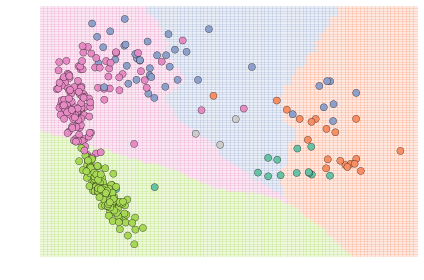

In [344]:
y = macaulay2016_target
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.clim(y.min(), y.max())

# Plot also the training points
plt.scatter(smushed_data[:, 0], smushed_data[:, 1], s=50, color=macaulay2016_metadata['cluster_color_hex'], 
            edgecolor='k') #c=macaulay2016_target, s=50, cmap='Set2')
plt.axis('off')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)        
plt.clim(y.min(), y.max())

In [345]:
smusher = FastICA(n_components=4, random_state=354)
smushed_data = pd.DataFrame(smusher.fit_transform(macaulay2016_expression_filtered))

# x_min, x_max = smushed_data[:, 0].min(), smushed_data[:, 0].max()
# y_min, y_max = smushed_data[:, 1].min(), smushed_data[:, 1].max()
# delta_x = 0.05 * abs(x_max - x_min)
# delta_y = 0.05 * abs(x_max - x_min)

# x_min -= delta_x
# x_max += delta_x
# y_min -= delta_y
# y_max += delta_y

# X = np.linspace(x_min, x_max, 100)
# Y = np.linspace(y_min, y_max, 100)
# xx, yy = np.meshgrid(X, Y)

# low_dimensional_space = np.c_[xx.ravel(), yy.ravel()]
# low_dimensional_space

In [364]:
smushed_data.max() - smushed_data.min()

0    0.224666
1    0.464860
2    0.278159
3    0.403858
dtype: float64

In [381]:
grid = smushed_data.apply(lambda x: pd.Series(np.linspace(x.min(), x.max(), 50)))
grid.head()
# grid = [x.ravel() for x in grid]
# grid
# low_dimensional_space = np.concatenate(grid, axis=0)
# low_dimensional_space.shape
# # low_dimensional_space = low_dimensional_space.reshape(shape)

,0,1,2,3
0,-0.117916,-0.319673,-0.088284,-0.231505
1,-0.113331,-0.310186,-0.082608,-0.223263
2,-0.108746,-0.300699,-0.076931,-0.215021
3,-0.104161,-0.291212,-0.071254,-0.206779
4,-0.099576,-0.281725,-0.065578,-0.198537


In [385]:
x1, x2, x3, x4 = np.meshgrid(*[grid[col] for col in grid])
low_dimensional_space = np.c_[x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel()]

In [ ]:
high_dimensional_space = smusher.inverse_transform(low_dimensional_space)

In [ ]:
smushed_data['hue'] = macau

In [ ]:
sns.pairplot(smushed_data)